# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Reviews Data

In [2]:
reviews = pd.read_csv(r"D:\Tony\Programming\Datasets\Yelp\yelp_restaurant_review.csv", encoding='utf-8')

In [3]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
1,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
2,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57
3,L2O_INwlrRuoX05KSjc4eg,5vD2kmE25YBrbayKhykNxQ,nlxHRv1zXGT0c0K51q3jDg,5.0,2,0,0,This is definitely my favorite fast food sub s...,2013-05-07 07:25:25
4,ZayJ1zWyWgY9S_TRLT_y9Q,aq_ZxGHiri48TUXJlpRkCQ,Pthe4qk5xh4n-ef-9bvMSg,5.0,1,0,0,"Really good place with simple decor, amazing f...",2015-11-05 23:11:05


# Restaurant Data

In [4]:
restaurant = pd.read_csv(r"D:\Tony\Programming\Datasets\Yelp\yelp_restaurant.csv", encoding='utf-8')

In [5]:
restaurant.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
1,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",NaN
2,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",NaN
4,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21..."


# Filter Restaurants

Filter restaurants that exist before 2018 and are still open

In [6]:
# Change date to datetime
reviews['date'] = pd.to_datetime(reviews['date'])  

# Filter reviews before 2018
mask_pre2018 = (reviews['date'] < '2018-1-1')
reviews_pre2018 = reviews.loc[mask_pre2018]

# Filter restaurants that are still open
restaurant = restaurant[restaurant['is_open'] == 1]

# Filter restaurants that exist before 2018
restaurant = restaurant.loc[restaurant['business_id'].isin(reviews_pre2018['business_id'])]

# Calculate popularity scores
restaurant['popularity'] = (restaurant['stars']-3)*np.log(restaurant['review_count'])

In [7]:
restaurant.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,popularity
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",2.414157
3,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",NaN,2.918865
5,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",2.302585
10,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Lebanese, Middle Eastern",NaN,0.000000
13,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Fast Food, Burgers","{'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ...",0.972955


# Filter Reviews

Filter reviews in 2018 for restaurants that we filtered earlier

In [8]:
# Filter reviews in 2018
mask_2018 = (reviews['date'] > '2018-1-1') & (reviews['date'] <= '2018-12-31')
reviews_2018 = reviews.loc[mask_2018 & (reviews['business_id'].isin(restaurant['business_id'].values))]

In [9]:
reviews_2018.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
16,-u8Oz_iSZACGwWW_pIT4zw,UreiTV1I9i-XF6_bJhK6Iw,d_q4avZYM1sOlQP7noJKVg,4.0,0,0,1,Always a fun outing to come for great hot dogs...,2018-04-15 11:13:11
43,IwlVSOnINIYnqRBjPrRDhQ,dZxXGlJtNwr9pag5UXCa4A,ACb637NG7EnswRs8U_BX_w,5.0,0,0,0,I travel lots for business and this is one of ...,2018-03-15 20:18:36
45,2E-1IudsdLlrvR6-gP51og,dZudYQD1T2U5RSJeJWYCLw,kBJfBVaXJtPEKLTov1hJdQ,5.0,1,1,0,When I'm Arizona...we Reathrey Sekong! \n\nFoo...,2018-03-15 19:48:59
49,5rY_i4Eao9ncLmzvF_JNYg,wGiUu3rFw83EDj8bzMzsuQ,FiW6w5nmhlUoJAyNofb4jg,1.0,0,0,0,We drive by Fruits and Roots almost daily and ...,2018-05-08 16:50:09
50,Lb9r62Qlu12ZB909CbFeOQ,sHUQOhH75nK0J6n_INkKDA,E54AvEdLfCFFkCvXmXJ7GA,1.0,1,1,1,I ordered a pizza at 4:49. Got an email that s...,2018-04-04 01:38:49


Filter reviews in 2019 for restaurants that we filtered earlier

In [10]:
# Filter reviews in 2019
mask_2019 = (reviews['date'] > '2019-1-1') & (reviews['date'] <= '2019-12-31')
reviews_2019 = reviews.loc[mask_2019 & (reviews['business_id'].isin(restaurant['business_id'].values))]

In [11]:
reviews_2019.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
290934,Vx-DPb4olxt1Zxf9dI8b2A,Donht4mLJ4aO4FQhqHGJtw,5eV8oUGdBXylwB7HeaDFOA,4.0,0,0,0,Top notch cuisine and very friendly service. E...,2019-01-02 19:11:49
291860,zAz8R8quJi2_dPffsOqaGw,BgMzrzJtDYK-yUuoJKcD4w,wSAGILK2CFbq5BVZ5D67-A,4.0,0,0,0,It pains me to give this 4 stars instead of 5 ...,2019-01-02 15:40:41
292540,gktlKl9JlkMxgylLOff_0w,-XXRB5HACMBpGI8dt8-SmA,OYfXGMEwcMKj_gty5e_Udg,4.0,2,1,0,Truly a hidden gem amongst HK-style cafes. Por...,2019-01-04 23:13:46
292542,z6Y7RnWn-F4OYLxyxsrefQ,HeKwDa_uhMu3H4uVB10Yyg,m9eF1rD6Cnwn69z45_cBLA,5.0,0,0,0,Wonderful wraps! I enjoyed the turkey wrap - I...,2019-01-12 17:28:31
292971,eyUE1Lte1Loac-y9kpqbCQ,kUUls6-NU6eSYeTXHtSPbA,1WtUgLhdBdQ39aBvEUbsnw,4.0,2,0,2,"The fact that all of their sushi is buy one, g...",2019-01-14 18:47:55


# Calculate Restaurant 2019 Popularity

In [12]:
restaurants_2019 = reviews_2019.groupby(['business_id']) \
    .agg({'stars': 'mean', 'text':'count'}) \
    .rename(columns={'stars':'stars', 'text':'count'}) \
    .reset_index()
restaurants_2019 = restaurants_2019[restaurants_2019['count'] > 1]
restaurants_2019['popularity'] = (restaurants_2019['stars']-3)*np.log(restaurants_2019['count'])

In [13]:
restaurants_2019.head()

,business_id,stars,count,popularity
0,--1UhMGODdWsrMastO9DZw,4.000000,3,1.098612
1,--6MefnULPED_I942VcFNA,1.636364,11,-3.269857
2,--9e1ONYQuAa-CB_Rrw7Tw,4.083333,132,5.289702
3,--DaPTJW3-tB1vP-PfdTEg,4.333333,3,1.464816
4,--FBCX-N37CMYDfs790Bnw,3.782609,23,2.453865


(array([4.000e+00, 1.400e+01, 5.400e+01, 2.010e+02, 4.900e+02, 9.920e+02,
        2.357e+03, 2.826e+03, 4.343e+03, 5.565e+03, 3.866e+03, 2.780e+03,
        1.859e+03, 1.160e+03, 6.480e+02, 3.440e+02, 1.200e+02, 4.300e+01,
        1.000e+01, 7.000e+00]),
 array([-8.01874897, -7.06204014, -6.10533131, -5.14862248, -4.19191365,
        -3.23520482, -2.27849599, -1.32178716, -0.36507833,  0.5916305 ,
         1.54833933,  2.50504816,  3.46175699,  4.41846582,  5.37517465,
         6.33188349,  7.28859232,  8.24530115,  9.20200998, 10.15871881,
        11.11542764]),
 <a list of 20 Patch objects>)

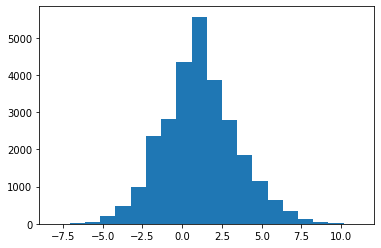

In [14]:
plt.hist(restaurants_2019['popularity'], bins=20)

# Save 2018 Reviews

### Text cleaning function

In [15]:
def textCleaner(texts):
    # Lower case
    texts = texts.str.lower()

    # Remove punctuation and spaces
    texts = texts.str.replace(r'\n', ' ')
    texts = texts.str.replace(r'\t', ' ')
    texts = texts.str.replace(r'\'', '\'')
    texts = texts.str.replace(r"[^\w\s']", ' ')
    texts = texts.str.strip()
    
    # Remove stop words
    STOPWORDS = set(stopwords.words('english'))
    for i in texts.index:
        texts[i] = ' '.join(word for word in texts[i].split() if word not in STOPWORDS)
        
    return texts    

### Clean the texts

In [16]:
text_clean_2018 = textCleaner(reviews_2018['text'])

In [17]:
text_clean_2018.head()

16    always fun outing come great hot dogs fixings ...
43    travel lots business one funniest places heath...
45    i'm arizona reathrey sekong food good authenti...
49    drive fruits roots almost daily finally decide...
50    ordered pizza 4 49 got email said pizza would ...
Name: text, dtype: object

# Export Data

### Reviews

In [18]:
business_reviews = pd.DataFrame()
business_reviews['business_id'] = reviews_2018['business_id']
business_reviews['user_id'] = reviews_2018['user_id']
business_reviews['stars'] = reviews_2018['stars']
business_reviews['like'] = reviews_2018['useful'] + reviews_2018['funny'] + reviews_2018['cool']
business_reviews['text'] = text_clean_2018
business_reviews['date'] = reviews_2018['date']

In [19]:
business_reviews.head()

,business_id,user_id,stars,like,text,date
16,d_q4avZYM1sOlQP7noJKVg,UreiTV1I9i-XF6_bJhK6Iw,4.0,1,always fun outing come great hot dogs fixings ...,2018-04-15 11:13:11
43,ACb637NG7EnswRs8U_BX_w,dZxXGlJtNwr9pag5UXCa4A,5.0,0,travel lots business one funniest places heath...,2018-03-15 20:18:36
45,kBJfBVaXJtPEKLTov1hJdQ,dZudYQD1T2U5RSJeJWYCLw,5.0,2,i'm arizona reathrey sekong food good authenti...,2018-03-15 19:48:59
49,FiW6w5nmhlUoJAyNofb4jg,wGiUu3rFw83EDj8bzMzsuQ,1.0,0,drive fruits roots almost daily finally decide...,2018-05-08 16:50:09
50,E54AvEdLfCFFkCvXmXJ7GA,sHUQOhH75nK0J6n_INkKDA,1.0,3,ordered pizza 4 49 got email said pizza would ...,2018-04-04 01:38:49


In [20]:
business_reviews.to_csv(r'D:\Tony\Programming\Datasets\Yelp\yelp_reviews_2018.csv', index=False, encoding='utf-8')

### Restaurants

In [21]:
restaurants_2019.to_csv(r'D:\Tony\Programming\Datasets\Yelp\yelp_restaurant_2019.csv', index=False, encoding='utf-8')